In [1]:
%matplotlib inline


Analysis of Iris petal and sepal sizes
=======================================

Ilustrate an analysis on a real dataset:

- Visualizing the data to formulate intuitions
- Fitting of a linear model
- Hypothesis test of the effect of a categorical variable in the presence
  of a continuous confound




In [4]:
import matplotlib.pyplot as plt

import pandas
from pandas.tools import plotting
import seaborn as sns
from statsmodels.formula.api import ols

# Load the data
# data = pandas.read_csv('iris.csv')
data = sns.load_dataset('iris')

Plot a scatter matrix



In [7]:
data.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


/home/szong/anaconda3/envs/szvenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  """
/home/szong/anaconda3/envs/szvenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


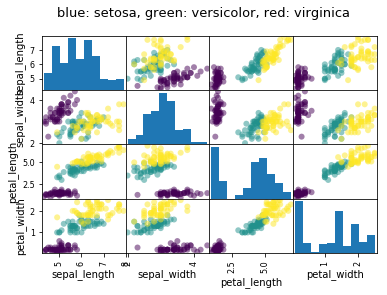

In [8]:
# Express the names as categories
categories = pandas.Categorical(data['species'])

# The parameter 'c' is passed to plt.scatter and will control the color
plotting.scatter_matrix(data, c=categories.labels, marker='o')

fig = plt.gcf()
fig.suptitle("blue: setosa, green: versicolor, red: virginica", size=13)

Statistical analysis



In [10]:
# Let us try to explain the sepal length as a function of the petal
# width and the category of iris

model = ols('sepal_width ~ species + petal_length', data).fit()
print(model.summary())

# Now formulate a "contrast", to test if the offset for versicolor and
# virginica are identical

print('Testing the difference between effect of versicolor and virginica')
print(model.f_test([0, 1, -1, 0]))
plt.show()

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     46.08
Date:                Thu, 22 Feb 2018   Prob (F-statistic):           5.14e-21
Time:                        15:31:02   Log-Likelihood:                -37.808
No. Observations:                 150   AIC:                             83.62
Df Residuals:                     146   BIC:                             95.66
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.99